In [139]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
from data.data_loader import ModelNet40
import os

import numpy as np
from utils import *

from model import *

### Getting the dataset path

In [141]:
modelnet40_path = os.path.join(os.getcwd(), os.path.join('data', 'dataset_path.txt'))

with open(modelnet40_path, 'r') as file:
    modelnet40_path = file.readline()

### Initalizing the training set DataLoader object

In [142]:
SAMPLE_SIZE = 256
TEST = False
SAMPLING_METHOD = 'fps'

In [143]:
train_loader_256 = ModelNet40(dataset_path=modelnet40_path, test=TEST, sample_size=SAMPLE_SIZE, sampling=SAMPLING_METHOD)

### Creating the model

In [144]:
in_features = 3
feature_dim = 128
out_features = 1024
k_size = 128
NUM_CLASSES = 40

In [145]:
model = PointCloudClassifier(in_features, feature_dim, out_features, k_size, NUM_CLASSES)

## Training specifications:

### Optimizer:

In [146]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-3
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(train_loader_256)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [133]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

criterion = CrossEntropyLoss()
criterion = NLLLoss()

## Overfitting the model

In [134]:
from train import train
epochs = 15
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=[train_loader_256[0]],
          criterion=criterion, epochs=epochs, verbose=False)

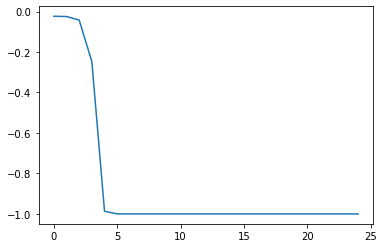

In [135]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [137]:
x_test = model(train_loader_256[0][0].float())
(torch.argmax(x_test) == train_loader_256[0][1]).item()

True

In [138]:
x_test

tensor([1.0000e+00, 9.8115e-25, 6.7920e-25, 5.1931e-25, 4.0600e-26, 8.0649e-25,
        2.4314e-25, 1.2271e-24, 5.1505e-25, 4.2583e-25, 7.5070e-25, 2.3828e-25,
        6.6633e-25, 5.5468e-25, 1.0325e-24, 5.3474e-25, 7.0295e-25, 5.2282e-25,
        3.1251e-25, 1.6517e-24, 1.2778e-24, 6.5971e-25, 1.0678e-24, 2.4814e-25,
        1.3238e-24, 1.8899e-25, 1.5779e-25, 4.6839e-25, 4.3990e-25, 4.7327e-25,
        1.3667e-24, 5.0117e-25, 6.0077e-25, 3.1468e-25, 1.0360e-24, 3.1456e-25,
        5.6460e-25, 1.2356e-25, 1.5556e-25, 5.1871e-25],
       grad_fn=<SoftmaxBackward0>)

## Training the model

In [99]:
model = PointCloudClassifier(in_features, feature_dim, out_features, k_size, NUM_CLASSES)

### Optimizer:

In [102]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR

parameters = model.parameters()
learning_rate = 1e-4
momentum = 0.9

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)

step = len(train_loader_256)
scheduler = CosineAnnealingLR(optimizer, step)

### Loss function:

In [101]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

criterion = CrossEntropyLoss()
criterion = NLLLoss()

In [103]:
epochs = 25
loss = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=train_loader_256,
          criterion=criterion, epochs=epochs, verbose=False)

ValueError: attempt to get argmax of an empty sequence